# Regression with Keras: Predict Avocado price

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/avocado.csv', index_col = 'Unnamed: 0')

In [3]:
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


### Description

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold


### Exercise:

1. Data cleaning
2. Do some visualization
3. Randomly separate train/test with ratio 80/20
4. Predict the `average price` using other columns

#### Data cleaning

In [4]:
# First clean columns where all value are na to avoid drop all df
df_clean = df.dropna(axis=1, how='any')
df_clean

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [36]:
# Then remove columns we don't want
#df_clean = df_clean.drop(columns=['Name', 'Nationality', 'Flag', 'Photo', 'Club', 'Club Logo', 'Work Rate', 'Body Type','Joined', 'Preferred Foot'])
df_clean = df_clean.drop(columns=['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Date', 'type', 'year', 'region'])
df_clean

,AveragePrice,Total Volume,4046,4225,4770
0,1.33,64236.62,1036.74,54454.85,48.16
1,1.35,54876.98,674.28,44638.81,58.33
2,0.93,118220.22,794.70,109149.67,130.50
3,1.08,78992.15,1132.00,71976.41,72.58
4,1.28,51039.60,941.48,43838.39,75.78
...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00
8,1.71,13888.04,1191.70,3431.50,0.00
9,1.87,13766.76,1191.92,2452.79,727.94
10,1.93,16205.22,1527.63,2981.04,727.01


In [18]:
df_clean.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type',
       'year', 'region'],
      dtype='object')

In [35]:
df_clean.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
type             object
year              int64
region           object
dtype: object

#### Visualization

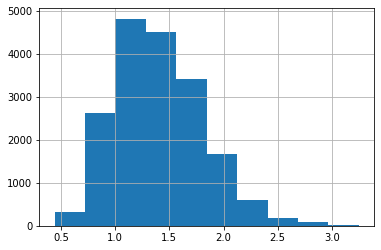

In [10]:
df_clean["AveragePrice"].hist()

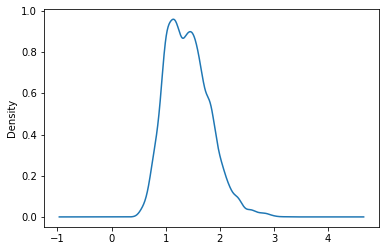

In [16]:
# df_clean.plot.bar()
df_clean["AveragePrice"].plot.kde()

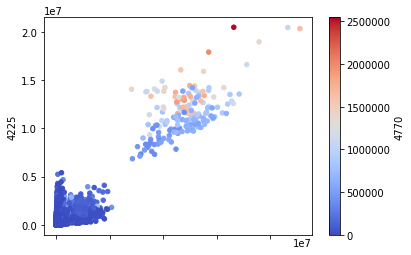

In [22]:
df_clean.plot.scatter(x='4046',y='4225', c='4770', cmap='coolwarm')

#### Randomly separate train/test with ratio 80/20

In [39]:
from sklearn.model_selection import train_test_split

Y = df_clean.AveragePrice
X = df_clean.drop(['AveragePrice'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=1/5)
print('train data:\t', X_train.shape, y_train.shape)
print('test data:\t', X_test.shape, y_test.shape)

train data:	 (14599, 4) (14599,)
test data:	 (3650, 4) (3650,)


#### Predict the average price using other columns

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

dim = X_train.shape[1]

model = Sequential()
model.add(Dense(8, input_dim=dim, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_16 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                

In [42]:
model.compile(loss='mae',
              optimizer='adam',
              metrics=['mae', 'mse'])

model.fit(X_train, y_train,
          epochs=50,
          batch_size=64)

Epoch 1/50
14599/14599 [==============================] - 2s 146us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1618
Epoch 2/50
14599/14599 [==============================] - 1s 97us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1619
Epoch 3/50
14599/14599 [==============================] - 1s 96us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1617
Epoch 4/50
14599/14599 [==============================] - 1s 100us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1618
Epoch 5/50
14599/14599 [==============================] - 1s 99us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1617
Epoch 6/50
14599/14599 [==============================] - 1s 99us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1620
Epoch 7/50
14599/14599 [==============================] - 1s 99us/step - loss: 0.3220 - mae: 0.3220 - mse: 0.1619
Epoch 8/50
14599/14599 [==============================] - 1s 98us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1615
Epoch 9/50
14599/14599 [==============================] - 2s 113us/step - loss: 0.3219

In [44]:
_, train_mae_err, train_mse_err = model.evaluate(X_train, y_train, batch_size=64)
_, test_mae_err, test_mse_err = model.evaluate(X_test, y_test, batch_size=64)
print('train_mae_err', train_mae_err)
print('test_mae_err', test_mae_err)
print('train_mse_err', train_mse_err)
print('test_mse_err', test_mse_err)

3650/3650 [==============================] - 0s 63us/step
train_mae_err 0.32186561822891235
test_mae_err 0.32875075936317444
train_mse_err 0.1618705689907074
test_mse_err 0.17009960114955902
